In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('..\datasets\mnist.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benso\AppData\Local\Temp\ipykernel_18332\2437145707.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('..\datasets\mnist.csv')


# EDA

In [3]:
df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.label.nunique()

10

In [5]:
df.label.value_counts()

label
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

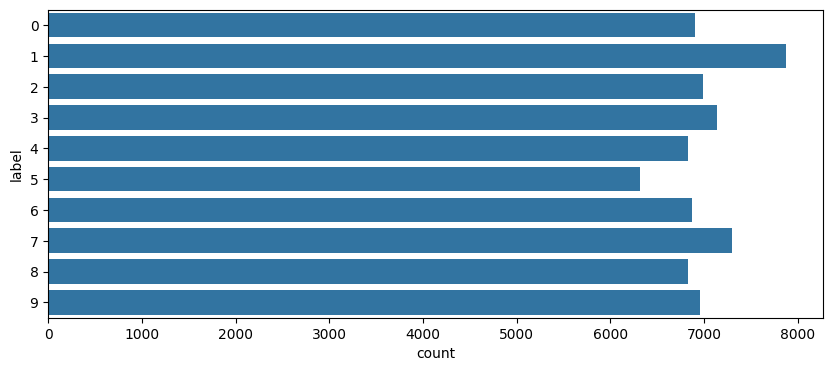

In [8]:
plt.figure(figsize=(10,4))
g=sns.countplot(y=df['label'])

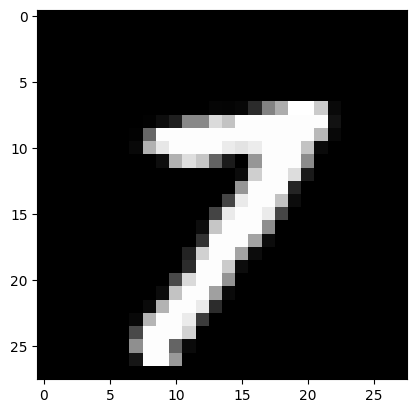

In [10]:
digit=df.iloc[40000,1:].values.reshape(28,28)
plt.imshow(digit,cmap='gray')

In [11]:
df.iloc[40000,0]

7

In [ ]:
indexex=np.random.randint(0,df.shape[0],size=25)

plt.figure(figsize=(4,4))

In [ ]:
X=df.drop('label',axis=1)
y=df.label